<a href="https://colab.research.google.com/github/Shilpa393/Marketing-Analytics-with-RFM-Project/blob/main/Marketing_analytics_with_RFM_Scoring_and_CLV_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Remove all the rows where Customer ID is null

df.dropna(subset=['CustomerID'],inplace=True)

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#Checking rows containing negative values

df[df['Quantity']<0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
#Dropping rows with containing negative values

df.drop(df[df['Quantity']<0].index,inplace=True)

In [ ]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


<Axes: xlabel='Country'>

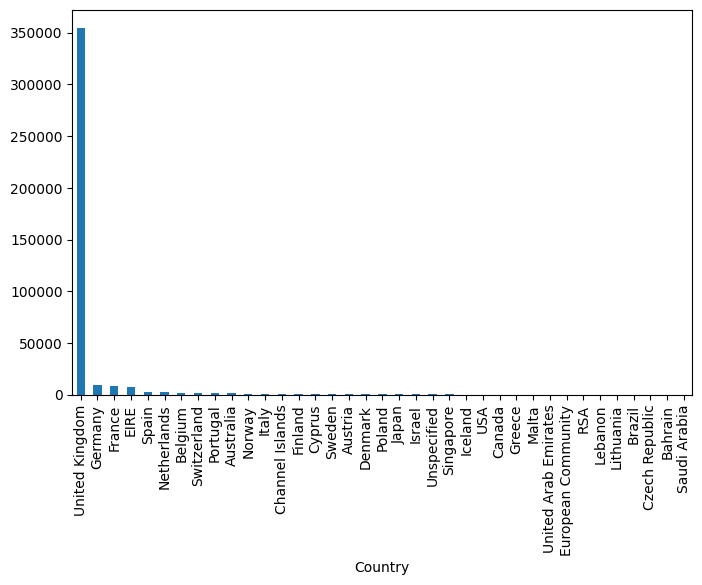

In [ ]:
df.Country.value_counts().plot.bar(figsize=(8,5))

In [ ]:
#Keeping only United Kingdom

df=df[df['Country']=='United Kingdom']

In [ ]:
#Convert Customer ID from float64 to int
df['CustomerID'] = df['CustomerID'].astype(int)

<ipython-input-17-3c362413375b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


In [ ]:
#Total price= Quantity*Price

df['Total_Price']=df['Quantity']*df['UnitPrice']

In [ ]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
378487,569651,85014B,RED RETROSPOT UMBRELLA,1,2011-10-05 12:49:00,5.95,14534,United Kingdom,5.95
16310,537646,22192,BLUE DINER WALL CLOCK,1,2010-12-07 15:39:00,8.50,17591,United Kingdom,8.50
506889,579161,22161,HEART DECORATION RUSTIC HANGING,5,2011-11-28 13:56:00,0.19,17379,United Kingdom,0.95
465781,576255,22163,HEART STRING MEMO HOLDER HANGING,1,2011-11-14 14:09:00,0.79,15993,United Kingdom,0.79
438623,574328,22986,WRAP GINGHAM ROSE,25,2011-11-04 09:05:00,0.42,13081,United Kingdom,10.50


#RFM Analysis

In [ ]:
df1= df.drop(['InvoiceNo','StockCode','Country','Description','UnitPrice','Quantity'],axis=1,inplace=True)

In [ ]:
#Convert df1 to DataFrame
df1=pd.DataFrame(df)

In [ ]:
df1.head()

,InvoiceDate,CustomerID,Total_Price
0,2010-12-01 08:26:00,17850,15.30
1,2010-12-01 08:26:00,17850,20.34
2,2010-12-01 08:26:00,17850,22.00
3,2010-12-01 08:26:00,17850,20.34
4,2010-12-01 08:26:00,17850,20.34


In [ ]:
# Set the reference date as the latest transaction date
reference_date = df1['InvoiceDate'].max()

In [ ]:
# Calculate Recency, Frequency, and Monetary values for each customer
rfm_data = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (reference_date - x.max()).days,'Total_Price': 'mean'}).reset_index()

# Rename columns for clarity
rfm_data.rename(columns={'InvoiceDate': 'Recency','Total_Price': 'MonetaryValue'}, inplace=True)

# Calculate Frequency separately
frequency_data = df1.groupby('CustomerID')['CustomerID'].count().reset_index(name='Frequency')

# Merge frequency data into RFM data
# Use 'customer_id' explicitly for both DataFrames
rfm_data = rfm_data.merge(frequency_data, left_on='CustomerID', right_on='CustomerID', how='left')

In [ ]:
rfm_data.head()

,CustomerID,Recency,MonetaryValue,Frequency
0,12346,325,77183.600000,1
1,12747,1,40.737961,103
2,12748,0,7.336756,4596
3,12749,3,20.557186,199
4,12820,2,15.971864,59


In [ ]:
# Perform RFM scoring
def rfm_scoring(rfm_data):
    # Recency score
    rfm_data['R'] = rfm_data['Recency'].apply(lambda x: 1 if x > 730 else (2 if x > 365 else 3))

    # Frequency score
    rfm_data['F'] = rfm_data['Frequency'].apply(lambda x: 1 if x == 1 else (2 if x <= 3 else 3))

    # Monetary score
    rfm_data['M'] = rfm_data['MonetaryValue'].apply(lambda x: 1 if x <= 20 else (2 if x <= 50 else 3))

    return rfm_data

In [ ]:
# Apply the scoring function
rfm_data = rfm_scoring(rfm_data)

In [ ]:
rfm_data.sample(5)

,CustomerID,Recency,MonetaryValue,Frequency,R,F,M
1585,15067,77,21.277561,82,3,3,2
3133,17189,105,6.301639,61,3,3,1
1566,15045,151,61.305000,12,3,3,3
512,13529,78,20.517333,15,3,3,2
243,13157,48,20.014023,87,3,3,2


##Silhouette score to determine number of clusters

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Select the features for clustering
features = rfm_data[['Recency', 'MonetaryValue', 'Frequency', 'R', 'F', 'M']]

In [ ]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

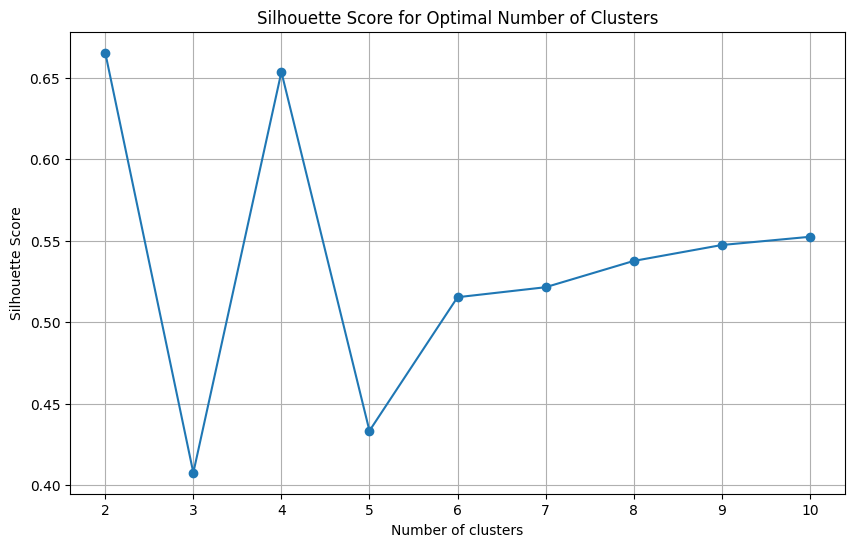

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):  # Starting from 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_features, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
silhouette_scores

[0.6653842190177321,
 0.407614528245183,
 0.6535732726674431,
 0.43332974168698457,
 0.5153287357219745,
 0.5214686719759628,
 0.5375859896518111,
 0.547365302473915,
 0.5524073041526523]

##Applying K-Means Clustering

In [ ]:
# Apply K-Means clustering

kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_data[['R', 'F', 'M']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
rfm_data

,CustomerID,Recency,MonetaryValue,Frequency,R,F,M,Cluster
0,12346,325,77183.600000,1,3,1,3,0
1,12747,1,40.737961,103,3,3,2,3
2,12748,0,7.336756,4596,3,3,1,1
3,12749,3,20.557186,199,3,3,2,3
4,12820,2,15.971864,59,3,3,1,1
...,...,...,...,...,...,...,...,...
3916,18280,277,18.060000,10,3,3,1,1
3917,18281,180,11.545714,7,3,3,1,1
3918,18282,7,14.837500,12,3,3,1,1
3919,18283,3,2.771005,756,3,3,1,1


In [ ]:
feat=['R','F','M','Cluster']

In [ ]:
#Check unique values along with the column names
for col in feat:
  print(f"{col} ----> Unique values: {rfm_data[col].unique()}")

R ----> Unique values: [3 2]
F ----> Unique values: [1 3 2]
M ----> Unique values: [3 2 1]
Cluster ----> Unique values: [0 3 1 2]


In [ ]:
#cluster 1 implies r =3, f =3, m=1

#cluster 0 implies r = 3, f = 1, m = 3

#cluster 2 implies r =3, f=3, m=3

#cluster 3 implies r = 3, f=3, m=2


In [ ]:
#Convert df to csv

rfm_data.to_csv('rfm_data.csv',index=False)

##Managerial segmentation

In [ ]:
# Function to score R, F, M values
# Define function to assign R, F, and M scores based on tertiles
def assign_rfm_scores_tertiles(rfm_data):
    # Calculate tertiles
    r_labels = ['Low', 'Medium', 'High']
    f_labels = ['Low', 'Medium', 'High']
    m_labels = ['Low', 'Medium', 'High']

    # Assign R scores (higher is better, so reverse the order)
    rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 3, labels=r_labels[::-1])

    # Assign F and M scores
    rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], 3, labels=f_labels)
    rfm_data['M_Score'] = pd.qcut(rfm_data['MonetaryValue'], 3, labels=m_labels)

    return rfm_data

In [ ]:
# Apply the function to the dataset
rfm_data_scored = assign_rfm_scores_tertiles(rfm_data)

In [ ]:
rfm_data_scored.head()

,CustomerID,Recency,MonetaryValue,Frequency,R,F,M,Cluster,R_Score,F_Score,M_Score
0,12346,325,77183.600000,1,3,1,3,0,Low,Low,High
1,12747,1,40.737961,103,3,3,2,3,High,High,High
2,12748,0,7.336756,4596,3,3,1,1,High,High,Low
3,12749,3,20.557186,199,3,3,2,3,High,High,Medium
4,12820,2,15.971864,59,3,3,1,1,High,Medium,Medium


In [ ]:
# Create RFM segment names
rfm_data_scored['RFM_Segment'] = rfm_data_scored['R_Score'].astype(str) + '-' + rfm_data_scored['F_Score'].astype(str) + '-' + rfm_data_scored['M_Score'].astype(str)


In [ ]:
# Count the number of customers in each RFM segment
segment_counts = rfm_data_scored['RFM_Segment'].value_counts().reset_index()
segment_counts.columns = ['RFM_Segment', 'Count']

In [ ]:
segment_counts

,RFM_Segment,Count
0,Low-Low-High,355
1,High-High-Low,340
2,Low-Low-Medium,254
3,High-High-Medium,217
4,Medium-Medium-Medium,201
5,Medium-Low-High,201
6,Medium-High-Low,200
7,Low-Medium-Low,187
8,High-High-High,187
9,Medium-Medium-Low,161


In [ ]:
# Define a mapping to club similar segments into larger actionable segments
segment_mapping = {
    'High-High-High': 'Champions',
    'High-High-Medium': 'Loyal Customers',
    'High-High-Low': 'Potential Loyalists',
    'High-Medium-High': 'Recent Big Spenders',
    'High-Medium-Medium': 'Recent Average Spenders',
    'High-Medium-Low': 'Recent Low Spenders',
    'High-Low-High': 'New Big Spenders',
    'High-Low-Medium': 'New Average Spenders',
    'High-Low-Low': 'New Low Spenders',
    'Medium-High-High': 'Big Spenders',
    'Medium-High-Medium': 'Frequent Shoppers',
    'Medium-High-Low': 'Frequent Low Spenders',
    'Medium-Medium-High': 'Average Shoppers',
    'Medium-Medium-Medium': 'Consistent Customers',
    'Medium-Medium-Low': 'Infrequent Low Spenders',
    'Medium-Low-High': 'Potential Big Spenders',
    'Medium-Low-Medium': 'Potential Average Spenders',
    'Medium-Low-Low': 'Potential Low Spenders',
    'Low-High-High': 'High Spending At-Risk',
    'Low-High-Medium': 'Medium Spending At-Risk',
    'Low-High-Low': 'Low Spending At-Risk',
    'Low-Medium-High': 'At-Risk Big Spenders',
    'Low-Medium-Medium': 'At-Risk Average Spenders',
    'Low-Medium-Low': 'At-Risk Low Spenders',
    'Low-Low-High': 'Lost Big Spenders',
    'Low-Low-Medium': 'Lost Average Spenders',
    'Low-Low-Low': 'Lost Low Spenders'
}

In [ ]:
# Map the RFM segments to larger actionable segments
rfm_data_scored['Actionable_Segment'] = rfm_data_scored['RFM_Segment'].map(segment_mapping)

In [ ]:
# Count the number of customers in each actionable segment
actionable_segment_counts = rfm_data_scored['Actionable_Segment'].value_counts().reset_index()
actionable_segment_counts.columns = ['Actionable_Segment', 'Count']

In [ ]:
# Display the actionable segment counts
actionable_segment_counts

,Actionable_Segment,Count
0,Lost Big Spenders,355
1,Potential Loyalists,340
2,Lost Average Spenders,254
3,Loyal Customers,217
4,Consistent Customers,201
5,Potential Big Spenders,201
6,Frequent Low Spenders,200
7,At-Risk Low Spenders,187
8,Champions,187
9,Infrequent Low Spenders,161


In [ ]:
# Identify the two most important and sizable segments
top_segments = actionable_segment_counts.head(2)
top_segments

,Actionable_Segment,Count
0,Lost Big Spenders,355
1,Potential Loyalists,340


#CLV Prediction

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Convert date column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
#Remove all the rows where Customer ID is null
#Step-1
df.dropna(subset=['CustomerID'],inplace=True)

In [ ]:
#Check negative values
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
# Ensure Quantity and UnitPrice are positive
#Step-2
df = df[df['Quantity'] > 0]

In [ ]:
# Create a total sales column
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Define a reference date for Recency calculation
reference_date = df['InvoiceDate'].max() + pd.DateOffset(1)

In [ ]:
# Define a cutoff date to split historical and future data (e.g., 6 months from the max date)
cutoff_date = df['InvoiceDate'].max() - pd.DateOffset(months=6)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Split the data into historical and future
historical_data = df[df['InvoiceDate'] <= cutoff_date]
future_data = df[df['InvoiceDate'] > cutoff_date]

In [ ]:
# Aggregate historical data to calculate RFM values
historical_rfm = historical_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalSales': 'sum'                                        # Monetary
}).reset_index()

In [ ]:
historical_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [ ]:
historical_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,247,3,1823.43
2,12348.0,249,3,1487.24
3,12350.0,310,1,334.40
4,12352.0,262,5,1561.81


In [ ]:
# Aggregate future data to calculate future monetary value
future_monetary = future_data.groupby('CustomerID').agg({'TotalSales': 'sum'}).reset_index()

future_monetary.columns = ['CustomerID', 'FutureMonetary']

In [ ]:
# Merge historical RFM and future monetary data
rfm_df = pd.merge(historical_rfm, future_monetary, on='CustomerID', how='left')
rfm_df['FutureMonetary'] = rfm_df['FutureMonetary'].fillna(0)

In [ ]:
rfm_df['CustomerID'] = rfm_df['CustomerID'].astype(int)

In [ ]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,FutureMonetary
0,12346,326,1,77183.60,0.00
1,12347,247,3,1823.43,2486.57
2,12348,249,3,1487.24,310.00
3,12350,310,1,334.40,0.00
4,12352,262,5,1561.81,944.23


In [ ]:
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary,FutureMonetary
count,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000
mean,15294.145005,248.514501,2.808450,1256.092392,1511.759689
std,1714.902642,55.033500,4.187943,4255.429352,7443.447182
min,12346.000000,184.000000,1.000000,2.900000,0.000000
25%,13819.000000,204.000000,1.000000,249.840000,0.000000
50%,15244.000000,235.000000,2.000000,485.920000,402.900000
75%,16769.000000,283.000000,3.000000,1098.270000,1224.160000
max,18287.000000,374.000000,91.000000,116135.920000,184015.670000


In [ ]:
features=['Recency', 'Frequency', 'Monetary']

In [ ]:
import seaborn as sns

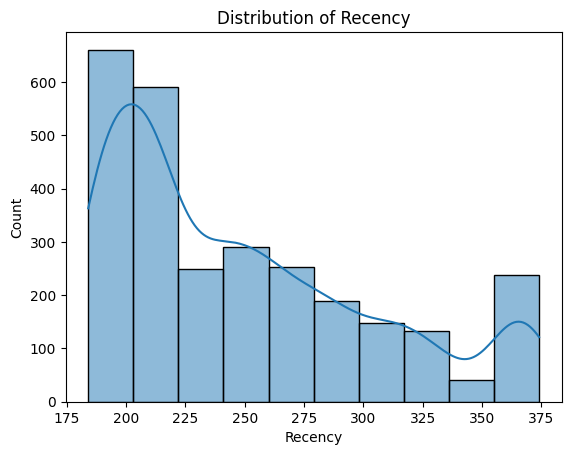

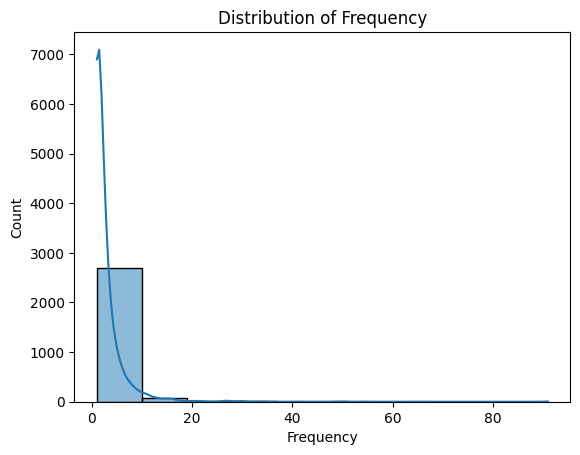

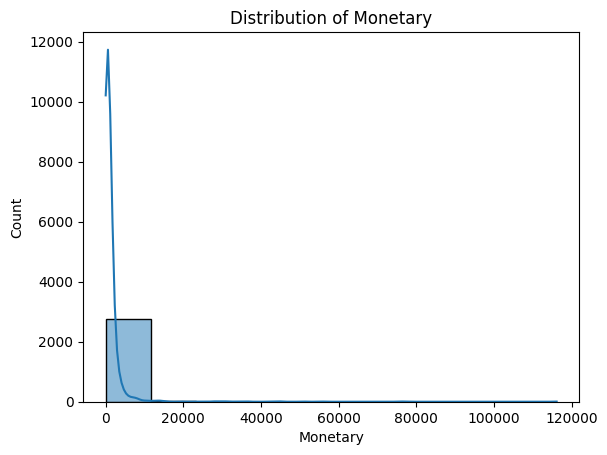

In [ ]:
#Checking distribution of the variables
for feature in features:
    plt.figure()
    sns.histplot(rfm_df[feature], bins=10, kde=True, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.show()

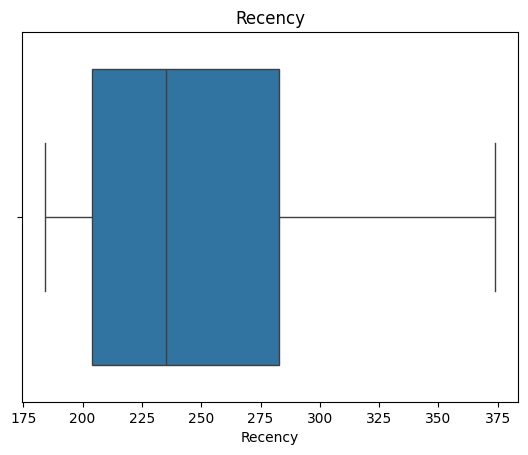

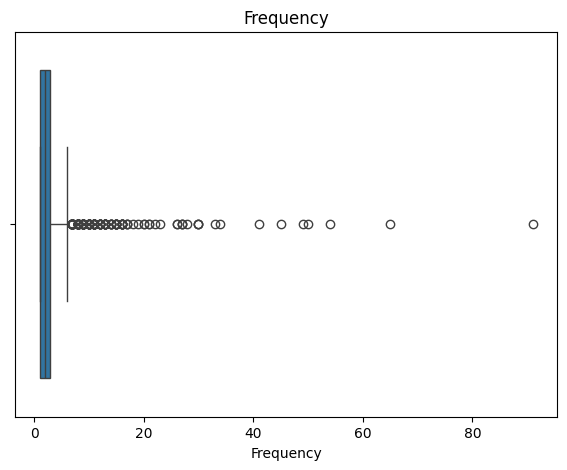

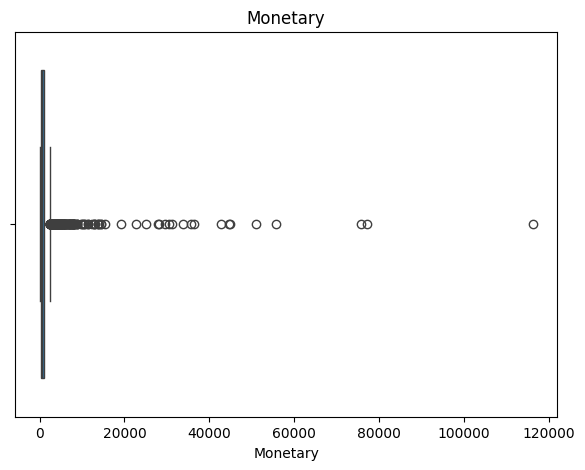

<Figure size 700x500 with 0 Axes>

In [ ]:
for feature in features:
    data=rfm_df.copy()
    sns.boxplot(x=data[feature])
    plt.title(feature)
    plt.figure(figsize=(7,5))

<Axes: >

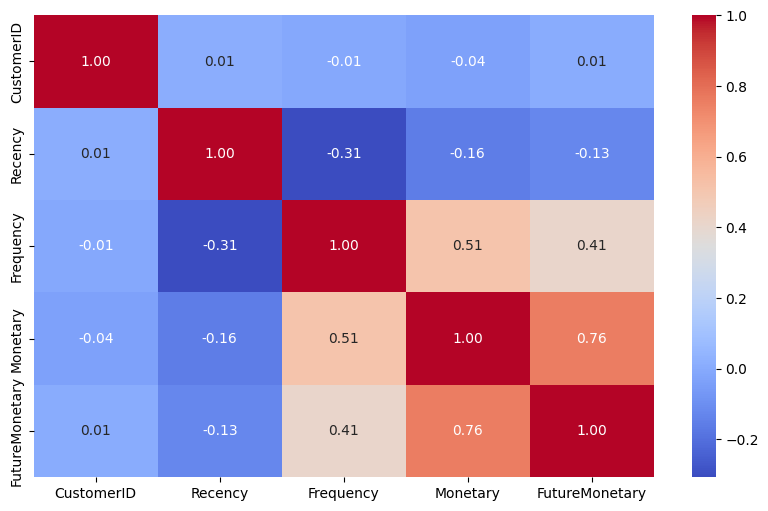

In [ ]:
correlation_matrix = rfm_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

Right-skewed data. Frequency & monetary has outliers. High correlation of monetary with target.

In [ ]:
#Splitting the data to avoid data leakage

from sklearn.model_selection import train_test_split

# Define features and target variable
features = ['Recency', 'Frequency', 'Monetary']
target = 'FutureMonetary'

# Split the data into training and testing sets
X = rfm_df[features]
y = rfm_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt = PowerTransformer(method='yeo-johnson')
data_transformed = pt.fit_transform(X_train[['Recency','Frequency','Monetary']])

In [ ]:
data_transformed2 = pt.transform(X_test[['Recency','Frequency','Monetary']])

In [ ]:
xtrain_scaled_df = pd.DataFrame(data_transformed, columns=X_train.columns)

In [ ]:
xtest_scaled_df = pd.DataFrame(data_transformed2, columns=X_test.columns)

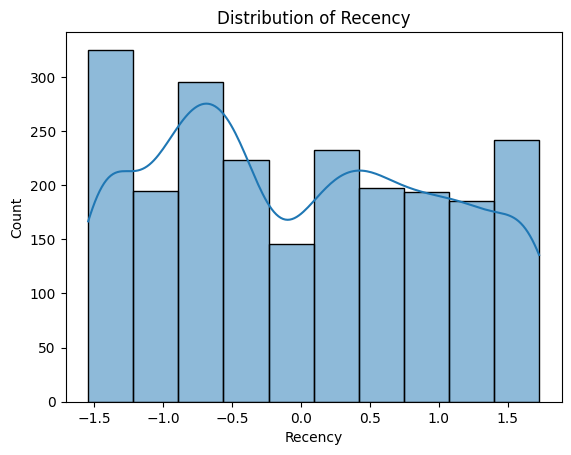

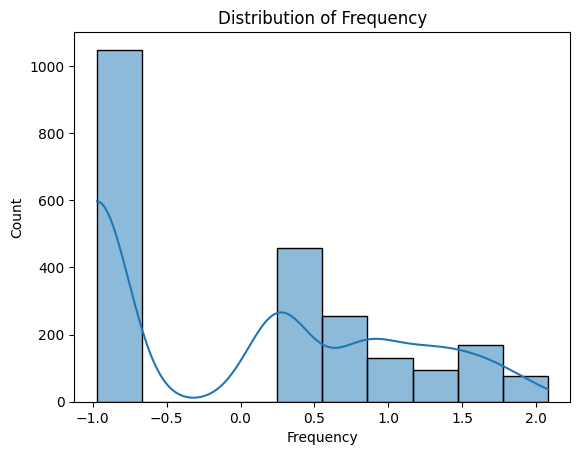

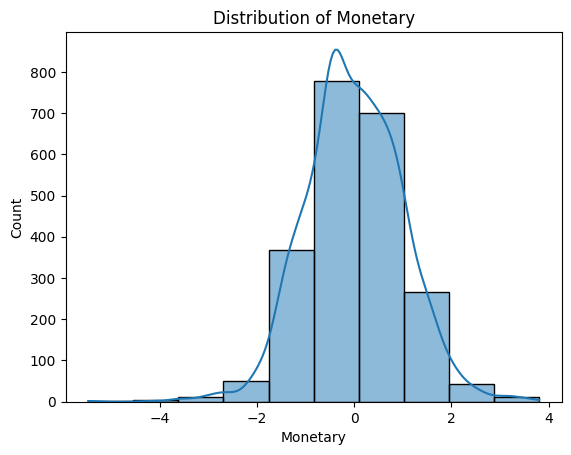

In [ ]:
for feature in features:
    plt.figure()
    sns.histplot(xtrain_scaled_df[feature], bins=10, kde=True, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.show()

In [ ]:
for feature in features:
  skewness = xtrain_scaled_df[feature].skew()
  print(f"Skewness of {feature}: {skewness}")

Skewness of Recency: 0.14208433952735017
Skewness of Frequency: 0.3590308645120136
Skewness of Monetary: -0.0274940236964437


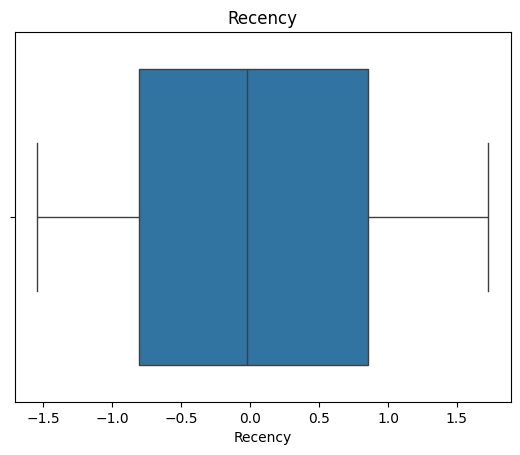

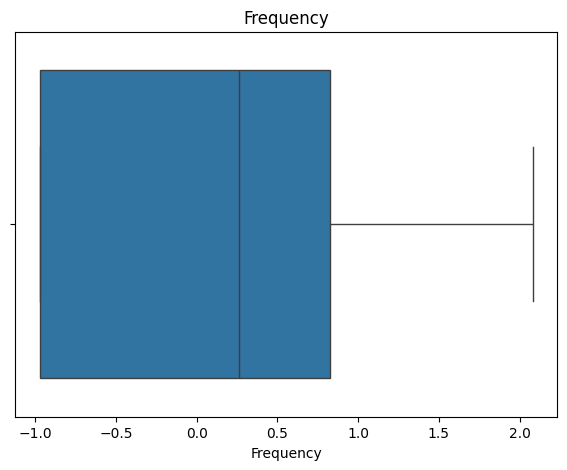

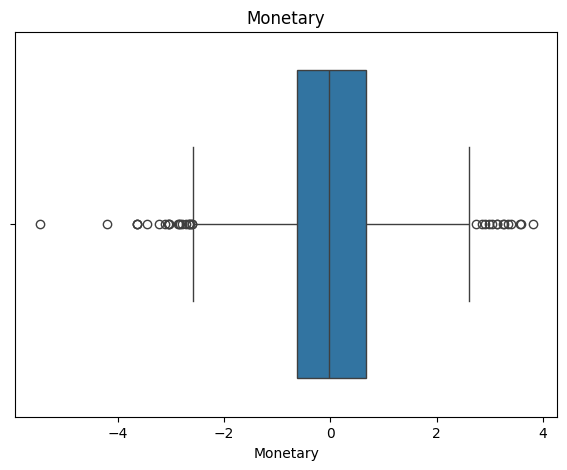

<Figure size 700x500 with 0 Axes>

In [ ]:
for feature in features:
    data=xtrain_scaled_df.copy()
    sns.boxplot(x=data[feature])
    plt.title(feature)
    plt.figure(figsize=(7,5))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a Linear Regression model
model = LinearRegression()
model.fit(xtrain_scaled_df, y_train)

# Predict on the test set
y_pred = model.predict(xtest_scaled_df)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 1574.8337836730886
Mean Squared Error (MSE): 9259723.618571661
R-squared (R²): 0.20752843369560703


In [ ]:
# Predict future monetary value for the entire dataset using the trained model
rfm_df_scaled = pt.transform(rfm_df[features])
rfm_df['PredictedFutureValue'] = model.predict(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Calculate total CLV for each customer
rfm_df['CLV'] = rfm_df['Monetary'] + rfm_df['PredictedFutureValue']

In [ ]:
rfm_df[['CustomerID', 'CLV']]

,CustomerID,CLV
0,12346,85344.299763
1,12347,5470.848490
2,12348,4802.827268
3,12350,743.977875
4,12352,4918.112952
...,...,...
2788,18272,3742.266515
2789,18273,-3024.697479
2790,18280,-439.988326
2791,18283,2542.623784


In [ ]:
# Segment customers based on CLV
rfm_df['CLV_Segment'] = pd.qcut(rfm_df['CLV'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

Low: Customers in the lowest 25% of CLV values.

Medium: Customers in the next 25% of CLV values (25th to 50th percentile).

High: Customers in the 50th to 75th percentile of CLV values.

Very High: Customers in the top 25% of CLV values.

In [ ]:
rfm_df[['CustomerID', 'CLV', 'CLV_Segment']]

,CustomerID,CLV,CLV_Segment
0,12346,85344.299763,Very High
1,12347,5470.848490,Very High
2,12348,4802.827268,Very High
3,12350,743.977875,Medium
4,12352,4918.112952,Very High
...,...,...,...
2788,18272,3742.266515,High
2789,18273,-3024.697479,Low
2790,18280,-439.988326,Low
2791,18283,2542.623784,High


* Low CLV Segment: These customers are expected to generate the least
  revenue.
* Medium CLV Segment: These customers fall into the mid-range of
  expected revenue.
* High CLV Segment: These customers are likely to generate significant
  revenue.
* Very High CLV Segment: These customers are expected to be the most
  valuable in terms of revenue.